## 1.Faktoryzacja QR

In [40]:
import numpy as np
from scipy.linalg import qr
import matplotlib.pyplot as plt

In [34]:
def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    u = np.zeros((n, n))

    
    u[:,0] = A[:,0]
    Q[:,0] = u[:,0] / np.linalg.norm(u[:,0])

    for i in range(1,n):
        u[:,i] = A[:,i]
        for j in range(i):
            u[:,i] -= np.dot(Q[:,j], A[:,i]) * Q[:,j]

        Q[:,i] = u[:,i] / np.linalg.norm(u[:,i])
    R = np.zeros((m, n))

    for i in range(n):
        for j in range(i,m):
            R[i,j] = np.dot(Q[:,i],A[:,j])

    return Q, R
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Q, R = qr_decomposition(A)

In [35]:
def diag_sign(A):
    "Compute the signs of the diagonal of matrix A"

    D = np.diag(np.sign(np.diag(A)))

    return D

def adjust_sign(Q, R):
    """
    Adjust the signs of the columns in Q and rows in R to
    impose positive diagonal of Q
    """

    D = diag_sign(Q)

    Q[:, :] = Q @ D
    R[:, :] = D @ R

    return Q, R

In [36]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 7]])
Q, R = adjust_sign(*qr_decomposition(A))
print("Implemented QR Decomposition:\n")
print("Q = \n", Q)
print("R = \n", R)

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 7]])
Q_scipy, R_scipt = adjust_sign(*qr(A, mode='economic'))
print("\nScipy QR Decomposition:\n")
print("Q_scipy = \n", Q_scipy)
print("R_scipt = \n", R_scipt)

Implemented QR Decomposition:

Q = 
 [[ 0.12309149  0.90453403  0.40824829]
 [ 0.49236596  0.30151134 -0.81649658]
 [ 0.86164044 -0.30151134  0.40824829]]
R = 
 [[ 8.1240384   9.6011363   9.35495331]
 [ 0.          0.90453403  2.41209076]
 [ 0.          0.         -0.81649658]]

Scipy QR Decomposition:

Q_scipy = 
 [[ 0.12309149  0.90453403  0.40824829]
 [ 0.49236596  0.30151134 -0.81649658]
 [ 0.86164044 -0.30151134  0.40824829]]
R_scipt = 
 [[ 8.1240384   9.6011363   9.35495331]
 [ 0.          0.90453403  2.41209076]
 [ 0.          0.         -0.81649658]]


In [37]:
# implement 5 tests to check if your QR decomposition is correct with library function

n_array = [50, 100, 200, 500, 1000]
for n in n_array:
    A = np.random.rand(n, n)
    Q, R = adjust_sign(*qr_decomposition(A))
    Q_scipy, R_scipy = adjust_sign(*qr(A, mode='economic'))
    print("\nTest for n = ", n)
    print("||Q - Q_scipy|| = ", np.linalg.norm(Q - Q_scipy))
    print("||R - R_scipy|| = ", np.linalg.norm(R - R_scipy))
    print("||QR - A|| = ", np.linalg.norm(Q @ R - A))

    



Test for n =  50
||Q - Q_scipy|| =  5.988581992366948e-13
||R - R_scipy|| =  1.6596969012987931e-13
||QR - A|| =  1.3914308524007167e-13

Test for n =  100
||Q - Q_scipy|| =  1.4608761963994807e-12
||R - R_scipy|| =  7.136771640967965e-13
||QR - A|| =  5.348313172648229e-13

Test for n =  200
||Q - Q_scipy|| =  2.7797701658076126e-11
||R - R_scipy|| =  1.076258309820331e-11
||QR - A|| =  8.252693835408626e-12

Test for n =  500
||Q - Q_scipy|| =  1.475448522313948e-09
||R - R_scipy|| =  5.598295760855747e-10
||QR - A|| =  5.554816874851069e-10

Test for n =  1000
||Q - Q_scipy|| =  1.926918276821616e-09
||R - R_scipy|| =  2.1739031217671048e-10
||QR - A|| =  1.9430634022375544e-10


In [78]:
def generate_n_eights(n):
    A = np.random.rand(8, 8)
    U, _, V = np.linalg.svd(A)
    initial_cond = 1

    matrixes = []
    for i in range(n):
        D = np.linspace(initial_cond,1,8)
        initial_cond *= 1 + np.random.random()
        matrixes.append(U @ np.diag(D) @ V)

    return matrixes

def get_plot(matrixes_num=50):
    matrixes = generate_n_eights(matrixes_num)
    conds = []
    diffs = []
    for A in matrixes:
        Q, R = qr(A)

        norm = np.linalg.norm(np.identity(8) - Q.T @ Q)
        cond = np.linalg.cond(A)
        conds.append(cond)
        diffs.append(norm)
    # line plot
    # plt.plot(conds, diffs)
    plt.plot(conds, diffs, marker='+', linestyle="None")
    plt.show()

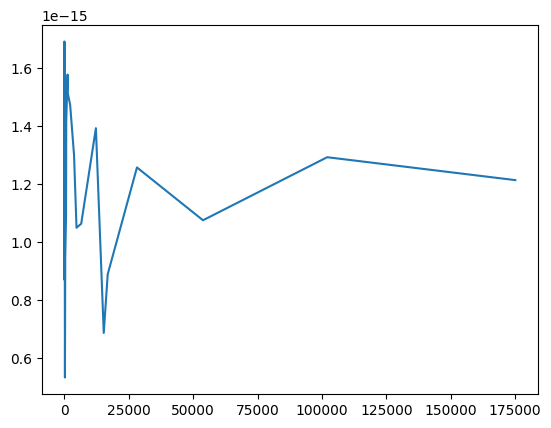

In [77]:
get_plot(30)

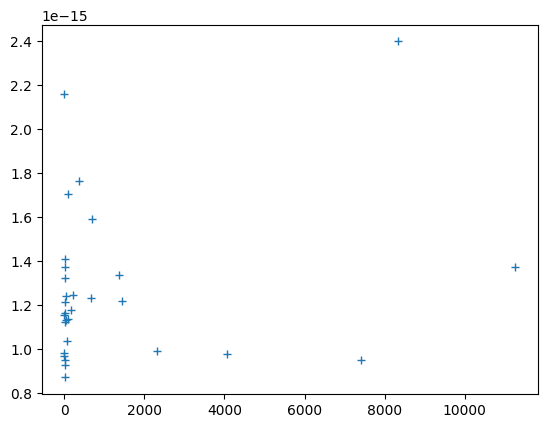

In [80]:
get_plot(30)

## 2. Rozwiązywanie układów metodą QR

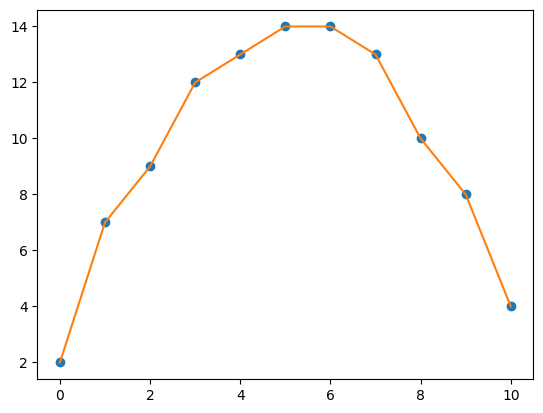

In [71]:
def solve_overdetermined_equation(A, b):
    Q, R = qr(A)
    y = Q.T @ b
    x = np.linalg.solve(R, y)
    return x

b = np.array([2,7,9,12,13,14,14,13,10,8,4])
# f(x) = a0 + a1x = a2x^2
# A = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])

x = solve_overdetermined_equation(A, b)
# draw it 
plt.plot(b, 'o')
plt.plot(A @ x)
plt.show()

